<a href="https://colab.research.google.com/github/yeonchaepark/LA2/blob/main/ex02_transform_tiefighter_%EB%B0%B0%ED%8F%AC_(1)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 선언

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

### 축 그리기 및 사각형 그리기

In [ ]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [ ]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [ ]:
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)

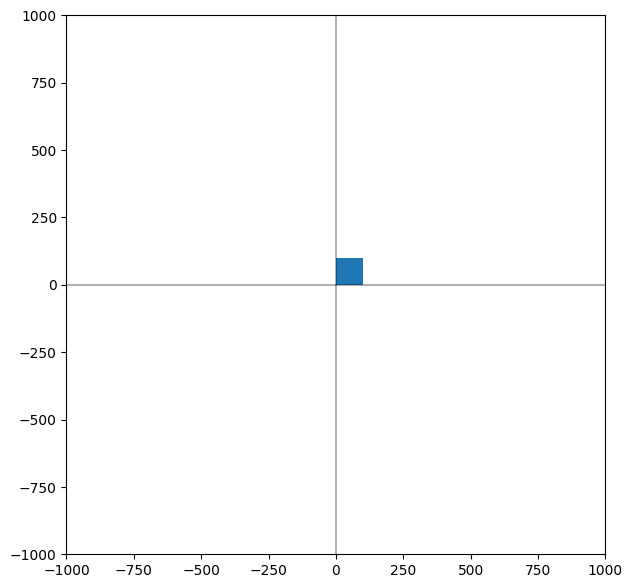

In [ ]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* ...

In [ ]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [ ]:
def rotate(p,theta):
  # 1. 동차좌표계 변환
  hp=np.array([p[0],p[1],1.0])

  # 2. 회전 변환 행렬 생성
  cos_theta=np.cos(theta)
  sin_theta=np.sin(theta)
  m=np.array([[cos_theta,-sin_theta,0.0],[sin_theta,cos_theta,0.0],[0.0,0.0,1.0]])

  # 3. 행렬과 벡터의 곱
  q=np.dot(m,hp)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q=np.array([q[0],q[1]])
  return q


In [ ]:
def scale(p,sx,sy):
  # 1. 동차 좌표계 변환
  hp=np.array([p[0],p[1],1.0])
  # 2. 크기 변환 행렬 생성
  m=np.array([[sx,0.0,0.0],[0.0,sy,0.0],[0.0,0.0,1.0]])
  # 3. 행렬과 벡터의 곱
  q=np.dot(m,hp)
  #print(q)
  # 4. 2차원 좌표계로 변환
  q=np.array([q[0],q[1]])
  return q

In [ ]:
def shear_x(p,sx):
  # 1. 동차 좌표계 변환
  hp=np.array([p[0],p[1],1.0])
  # 2. 기울기 변환 행렬 생성
  m=np.array([[1.0,sx,0.0],[0.0,1.0,0.0],[0.0,0.0,0.0]])
  # 3. 행렬과 벡터의 곱
  q=np.dot(m,hp)
  #print(q)
  # 4. 2차원 좌표계로 변환
  q=np.array([q[0],q[1]])
  return q

In [ ]:
def shear_y(p,sy):
  # 1. 동차 좌표계 변환
  hp=np.array([p[0],p[1],1.0])
  # 2. 기울기 변환 행렬 생성
  m=np.array([[1.0,0.0,0.0],[sy,1.0,0.0],[0.0,0.0,0.0]])
  # 3. 행렬과 벡터의 곱
  q=np.dot(m,hp)
  #print(q)
  # 4. 2차원 좌표계로 변환
  q=np.array([q[0],q[1]])
  return q

In [ ]:
def reflect_x(p):
  # 1. 동차 좌표계 변환
  hp=np.array([p[0],p[1],1.0])
  # 2. 반전 변환 행렬 생성
  m=np.array([[1.0,0.0,0.0],[0.0,-1.0,0.0],[0.0,0.0,0.0]])
  # 3. 행렬과 벡터의 곱
  q=np.dot(m,hp)
  #print(q)
  # 4. 2차원 좌표계로 변환
  q=np.array([q[0],q[1]])
  return q

In [ ]:
def reflect_y(p):
  # 1. 동차 좌표계 변환
  hp=np.array([p[0],p[1],1.0])
  # 2. 반전 변환 행렬 생성
  m=np.array([[-1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,0.0]])
  # 3. 행렬과 벡터의 곱
  q=np.dot(m,hp)
  #print(q)
  # 4. 2차원 좌표계로 변환
  q=np.array([q[0],q[1]])
  return q

In [ ]:
def reflect_o(p):
  # 1. 동차 좌표계 변환
  hp=np.array([p[0],p[1],1.0])
  # 2. 반전 변환 행렬 생성
  m=np.array([[-1.0,0.0,0.0],[0.0,-1.0,0.0],[0.0,0.0,0.0]])
  # 3. 행렬과 벡터의 곱
  q=np.dot(m,hp)
  #print(q)
  # 4. 2차원 좌표계로 변환
  q=np.array([q[0],q[1]])
  return q

In [ ]:
def reflect_yx(p):
  # 1. 동차 좌표계 변환
  hp=np.array([p[0],p[1],1.0])
  # 2. 반전 변환 행렬 생성
  m=np.array([[0.0,1.0,0.0],[1.0,0.0,0.0],[0.0,0.0,0.0]])
  # 3. 행렬과 벡터의 곱
  q=np.dot(m,hp)
  #print(q)
  # 4. 2차원 좌표계로 변환
  q=np.array([q[0],q[1]])
  return q

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [ ]:
def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  # 2. 크기 변환: S(5, 5)
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  #polygon 그리기
  draw_rectangle(ax, q1, q2, q3, q4)
  

  for i in range(1,150):
    q1 = rotate(q1, 3.14/150.0)
    q2 = rotate(q2, 3.14/150.0)
    q3 = rotate(q3, 3.14/150.0)
    q4 = rotate(q4, 3.14/150.0)

    #polygon 그리기
    draw_rectangle(ax, q1, q2, q3, q4)

  


  

    


In [ ]:
def draw_left_arm(p1,p2,p3,p4):# 왼쪽 날개축
  
  # 1. 크기 변환: S(20,5)
  
  sx=7
  sy=1
  q1=scale(p1,sx,sy)
  q2=scale(p2,sx,sy)
  q3=scale(p3,sx,sy)
  q4=scale(p4,sx,sy)
  
  # 2. 회전 변환
  q1=rotate(q1,-3.14/15)
  q2=rotate(q2,-3.14/15)
  q3=rotate(q3,-3.14/15)
  q4=rotate(q4,-3.14/15)

  
  # 3. 이동 변환
  
  dx=80
  dy=100
  q1=translate(q1,dx,dy)
  q2=translate(q2,dx,dy)
  
  q3=translate(q3,dx,dy)
  q4=translate(q4,dx,dy)

 
  
  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

  # ?. x축 기준 반전 변환
  q1=reflect_x(q1)
  q2=reflect_x(q2)
  q3=reflect_x(q3)
  q4=reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

  
  
  
  



In [ ]:
def draw_left_wing(p1, p2, p3, p4): # 왼쪽 날개
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 1. 크기 변환: S(20,5)
  
  sx=1
  sy=5
  
  q1=scale(q1,sx,sy)
  q2=scale(q2,sx,sy)
  q3=scale(q3,sx,sy)
  q4=scale(q4,sx,sy)
  
  # 2. 

  
  # 3. 이동 변환
  
  

  q1=translate(q1,800,100)
  q2=translate(q2,800,-100)
  
  q3=translate(q3,800,100)
  q4=translate(q4,800,-100)

  draw_rectangle(ax, q1, q2, q3, q4)

  #회전변환

  q1=rotate(q1,3.14/20)
  q2=rotate(q2,3.14/20)
  q3=rotate(q3,3.14/20)
  q4=rotate(q4,3.14/20)

  # 3. 이동 변환
  
  dx=-30
  dy=300
  q1=translate(q1,dx,dy)
  q2=translate(q2,dx,dy)
  
  q3=translate(q3,dx,dy)
  q4=translate(q4,dx,dy)

  draw_rectangle(ax, q1, q2, q3, q4)



In [ ]:
def draw_right_wing(p1, p2, p3, p4): # 오른쪽 날개
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 1. 크기 변환: S(20,5)
  
  sx=1
  sy=10
  
  q1=scale(q1,sx,sy)
  q2=scale(q2,sx,sy)
  q3=scale(q3,sx,sy)
  q4=scale(q4,sx,sy)
  
  # 2. 

  
  # 3. 이동 변환
  
  

  q1=translate(q1,800,100)
  q2=translate(q2,800,-100)
  
  q3=translate(q3,800,100)
  q4=translate(q4,800,-100)

  draw_rectangle(ax, q1, q2, q3, q4)
  # y축 기준 변환
  q1=reflect_y(q1)
  q2=reflect_y(q2)
  q3=reflect_y(q3)
  q4=reflect_y(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
def draw_right_arm(p1,p2,p3,p4):# 오른쪽 날개축
  
  # 1. 크기 변환: S(20,5)
  
  sx=7
  sy=1
  q1=scale(p1,sx,sy)
  q2=scale(p2,sx,sy)
  q3=scale(p3,sx,sy)
  q4=scale(p4,sx,sy)
  
  # 2. 회전 변환
  q1=rotate(q1,-3.14/15)
  q2=rotate(q2,-3.14/15)
  q3=rotate(q3,-3.14/15)
  q4=rotate(q4,-3.14/15)

  
  # 3. 이동 변환
  
  dx=70
  dy=100
  q1=translate(q1,dx,dy)
  q2=translate(q2,dx,dy)
  
  q3=translate(q3,dx,dy)
  q4=translate(q4,dx,dy)

 # ?. y축 기준 반전 변환
  q1=reflect_y(q1)
  q2=reflect_y(q2)
  q3=reflect_y(q3)
  q4=reflect_y(q4)
  
  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)
  # ?. x축 기준 반전 변환
  q1=reflect_x(q1)
  q2=reflect_x(q2)
  q3=reflect_x(q3)
  q4=reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)




In [ ]:
def draw_star(p1,p2,p3,p4):# 별 만들기
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  
  
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  # 2. 크기 변환: S(5, 5)
  s = 0.5
  q1 = scale(q1, s, 0.8)
  q2 = scale(q2, s, 0.8)
  q3 = scale(q3, s, 0.8)
  q4 = scale(q4, s, 0.8)
  # 이동 변환
  dx=700
  dy=800
  q1=translate(q1,dx,dy)
  q2=translate(q2,dx,dy)
  
  q3=translate(q3,dx,dy)
  q4=translate(q4,dx,dy)

  #polygon 그리기
  draw_rectangle(ax, q1, q2, q3, q4)

  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  
  
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  # 2. 크기 변환: S(5, 5)
  s = 0.8
  q1 = scale(q1, s, 0.5)
  q2 = scale(q2, s, 0.5)
  q3 = scale(q3, s, 0.5)
  q4 = scale(q4, s, 0.5)
  # 이동 변환
  dx=700
  dy=800
  q1=translate(q1,dx,dy)
  q2=translate(q2,dx,dy)
  
  q3=translate(q3,dx,dy)
  q4=translate(q4,dx,dy)

  #polygon 그리기
  draw_rectangle(ax, q1, q2, q3, q4)

############################################################
# 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  
  
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  # 2. 크기 변환: S(5, 5)
  s = 0.3
  q1 = scale(q1, s, 0.5)
  q2 = scale(q2, s, 0.5)
  q3 = scale(q3, s, 0.5)
  q4 = scale(q4, s, 0.5)
  # 이동 변환
  dx=400
  dy=500
  q1=translate(q1,dx,dy)
  q2=translate(q2,dx,dy)
  
  q3=translate(q3,dx,dy)
  q4=translate(q4,dx,dy)

  #polygon 그리기
  draw_rectangle(ax, q1, q2, q3, q4)

  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  
  
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  # 2. 크기 변환: S(5, 5)
  s = 0.5
  q1 = scale(q1, s, 0.3)
  q2 = scale(q2, s, 0.3)
  q3 = scale(q3, s, 0.3)
  q4 = scale(q4, s, 0.3)
  # 이동 변환
  dx=400
  dy=500
  q1=translate(q1,dx,dy)
  q2=translate(q2,dx,dy)
  
  q3=translate(q3,dx,dy)
  q4=translate(q4,dx,dy)

  #polygon 그리기
  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  ####위는 건드리지 말 것!

  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)

  # 2. 왼쪽 날개축 그리기
  draw_left_arm(p1, p2, p3, p4) 
  
  # 3. 왼쪽 날개 그리기(보완 필요)
  draw_left_wing(p1, p2, p3, p4) 
  

  # 4. 오른쪽 날개축 그리기
  draw_right_arm(p1, p2, p3, p4) 
  
  
  # 5. 오른쪽 날개 그리기
  draw_right_wing(p1, p2, p3, p4) 
  
  # 6. 별 만들기
  draw_star(p1,p2,p3,p4)

  
  

### 3. main

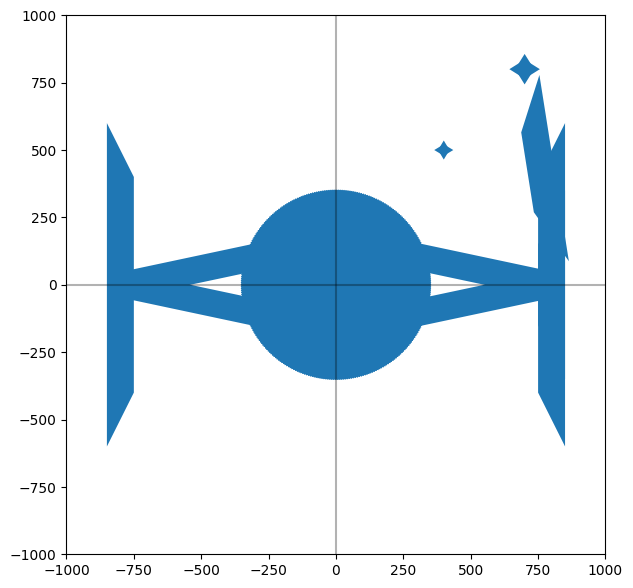

In [ ]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()